In [12]:
import sympy as symp
import numpy as np
import matplotlib.pyplot as plt
import PDE as PDE
import cmath as cmath
I = cmath.sqrt(-1)

# 第五章作业

1. 方程的解见代码，解的列表太长，如果画二维图形要花的线太多，这里只画一个时刻的函数图像。另外还有在$x=0.5$处的数值解与精确解的对比

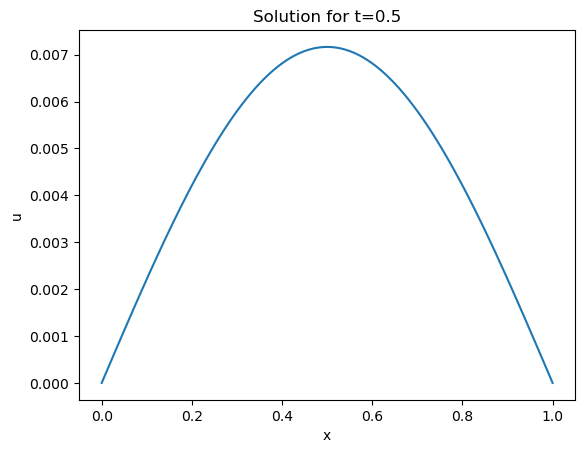

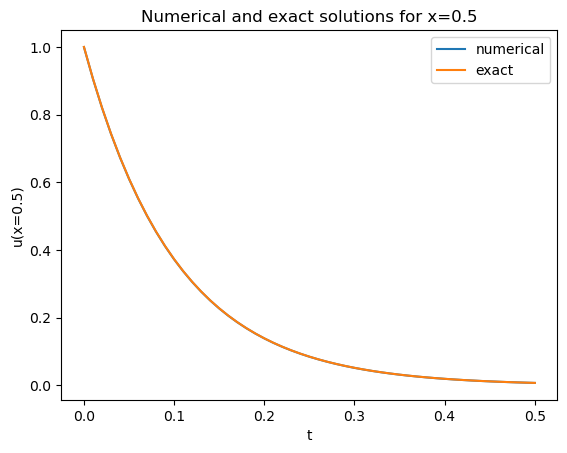

In [9]:
t = symp.symbols('t')
x = symp.symbols('x')
xlist1, tlist1, ylist1 = PDE.Diff_Diffusion(
    1, step=50, h=0.01, DefCond={(t, 0): 0, (t, 1): 0, (0, x): symp.sin(np.pi * x)}
)

y = [ylist1[l][51] for l in range(len(ylist))]
y_exp_list = [symp.exp(-np.pi**2 * t).subs({t: element}) for element in tlist]

plt.plot(xlist1, ylist1[-1])
plt.title("Solution for t=0.5")  
plt.xlabel("x")  
plt.ylabel("u")  
plt.show()  

plt.plot(tlist1, y,label='numerical')
plt.plot(tlist1, y_exp_list,label='exact')
plt.title("Numerical and exact solutions for x=0.5")  
plt.xlabel("t")  
plt.ylabel("u(x=0.5)")  
plt.legend()
plt.show()  

2. 见如下代码

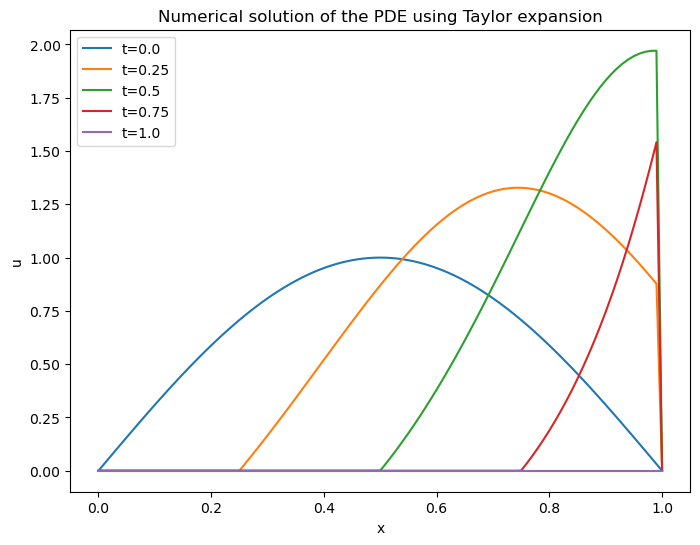

In [10]:
dx = 0.01
dt = 0.01
T = 1.0
X = 1.0

Nx = int(X / dx)
Nt = int(T / dt)

# 初始化解数组
u = np.zeros((Nx+1, Nt+1))

# 设置初始条件
x = np.linspace(0, X, Nx+1)
u[:, 0] = np.sin(np.pi * x)

# 使用泰勒展开进行差分格式推导
for j in range(Nt):
    for i in range(1, Nx):
        u[i, j+1] = u[i, j] - dt/dx * (u[i, j] - u[i-1, j]) + dt * u[i, j]**2

# 绘制数值解
plt.figure(figsize=(8, 6))
for j in range(0, Nt+1, int(Nt/4)):
    plt.plot(x, u[:, j], label='t='+str(j*dt))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Numerical solution of the PDE using Taylor expansion')
plt.legend()
plt.show()

3. 见如下代码。假定$x =  \pm 10$时波函数为0。实际的波函数衰减的很快。从解的图像中可以看出假设是合理的

d:\Coding Programs\Anaconda\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Coding Programs\Anaconda\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


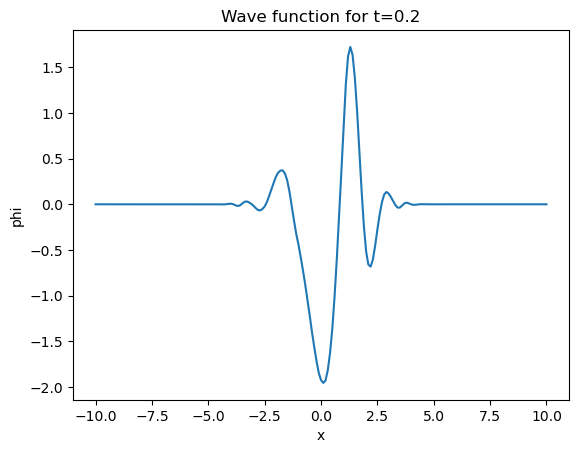

In [18]:
x = symp.symbols("x")
t = symp.symbols("t")

x_0 = 0
V_0 = 10
sigma = 0.5
k_0 = 1
a = 1
V = symp.Piecewise((V_0, np.abs(x - x_0) <= a), (0, np.abs(x - x_0) > a))
xlist, tlist, ylist = PDE.Diff_Schrodinger(
    V,
    symbols=[t, x],
    DefCond={
        (0, x): symp.exp(I * k_0 * x - (x - x_0) ** 2) * np.log(20) / (2 * sigma),
        (t, -10): 0,
        (t, 10): 0,
    },
    h=0.1,
    step=50,
)

plt.plot(xlist, ylist[20])
plt.title("Wave function for t=0.2")  # 添加标题
plt.xlabel("x")  # 添加x轴标签
plt.ylabel("phi")  # 添加y轴标签
plt.show()